# Final Project
Info 583


# Define a business problem:

Link to dataset: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

Customer churn accounts for the amount of paying customers who will no longer be using a service or continue being a customer of a certain business. Churn prediction is essential for any successful business. High customer churn can not only be expensive for a business, but it also demonstrates that customers may be dissatisfied with the business’s products or services. This will negatively impact future growth and revenue. So, it is important to try to minimize customer churn by understanding what variables impact this potential problem. If a business can identify the variables that determine whether or not a customer will continue using their products or services, they can minimize churn and maximize profits.

All businesses are impacted by customer churn. Banks, for example, want customers to continue using their services and be loyal to their comapny for as long as possible. For banks, understanding customer churn is especially important because it is a competitive market, built on trust and satisfaction. In order to gain customer's loyalty keep their business to , the bank must anticipate what might impact a customer to leave and join another bank. Conversely, they may want to understand or identify trends in what attributes long term loyal customers have as well. For example, understanding patterns by viewing operational data, like tenure, credit card usage, or even country of residence can help a business predict the probability of churn for each customer.

# Perform exploratory data analysis:

In [ ]:
#Load Packages
#All
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#Logistic Regression
from sklearn.linear_model import LogisticRegression
import math
import statsmodels.api as sm

#kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

from sklearn.model_selection import cross_val_score

#Decision Tree
from sklearn import tree
import graphviz

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Boosted Tree
from sklearn.ensemble import AdaBoostClassifier

#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

#ANN
from sklearn.neural_network import MLPClassifier

#Keras Classification
from tensorflow import keras
from keras.models import Sequential, load_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
#Load Data
from google.colab import files
uploaded = files.upload()

import io
bank = pd.read_csv('Bank Customer Churn Prediction.csv')

Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction.csv


In [ ]:
bank = bank.drop('customer_id', axis=1)

In [ ]:
len(bank)

10000

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
#products_number appears to be a signifier of what type of product the customer uses.
bank.products_number = bank.products_number.astype(object)

In [ ]:
bank.churn.mean()

0.2037

credit_score        1744
country             1744
gender              1744
age                 1744
tenure              1744
balance             1744
products_number     1744
credit_card         1744
active_member       1744
estimated_salary    1744
churn               1744
dtype: int64


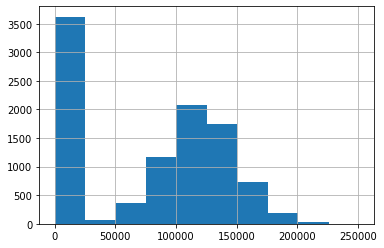

In [ ]:
#We can see that there are a high number of accounts with a balance of 0, but because many of these belong to inactive customers, we don't believe that these represent missing values.
bank['balance'].hist()
print(bank.loc[(bank['balance'] == 0) & (bank['active_member'] == 0)].count())

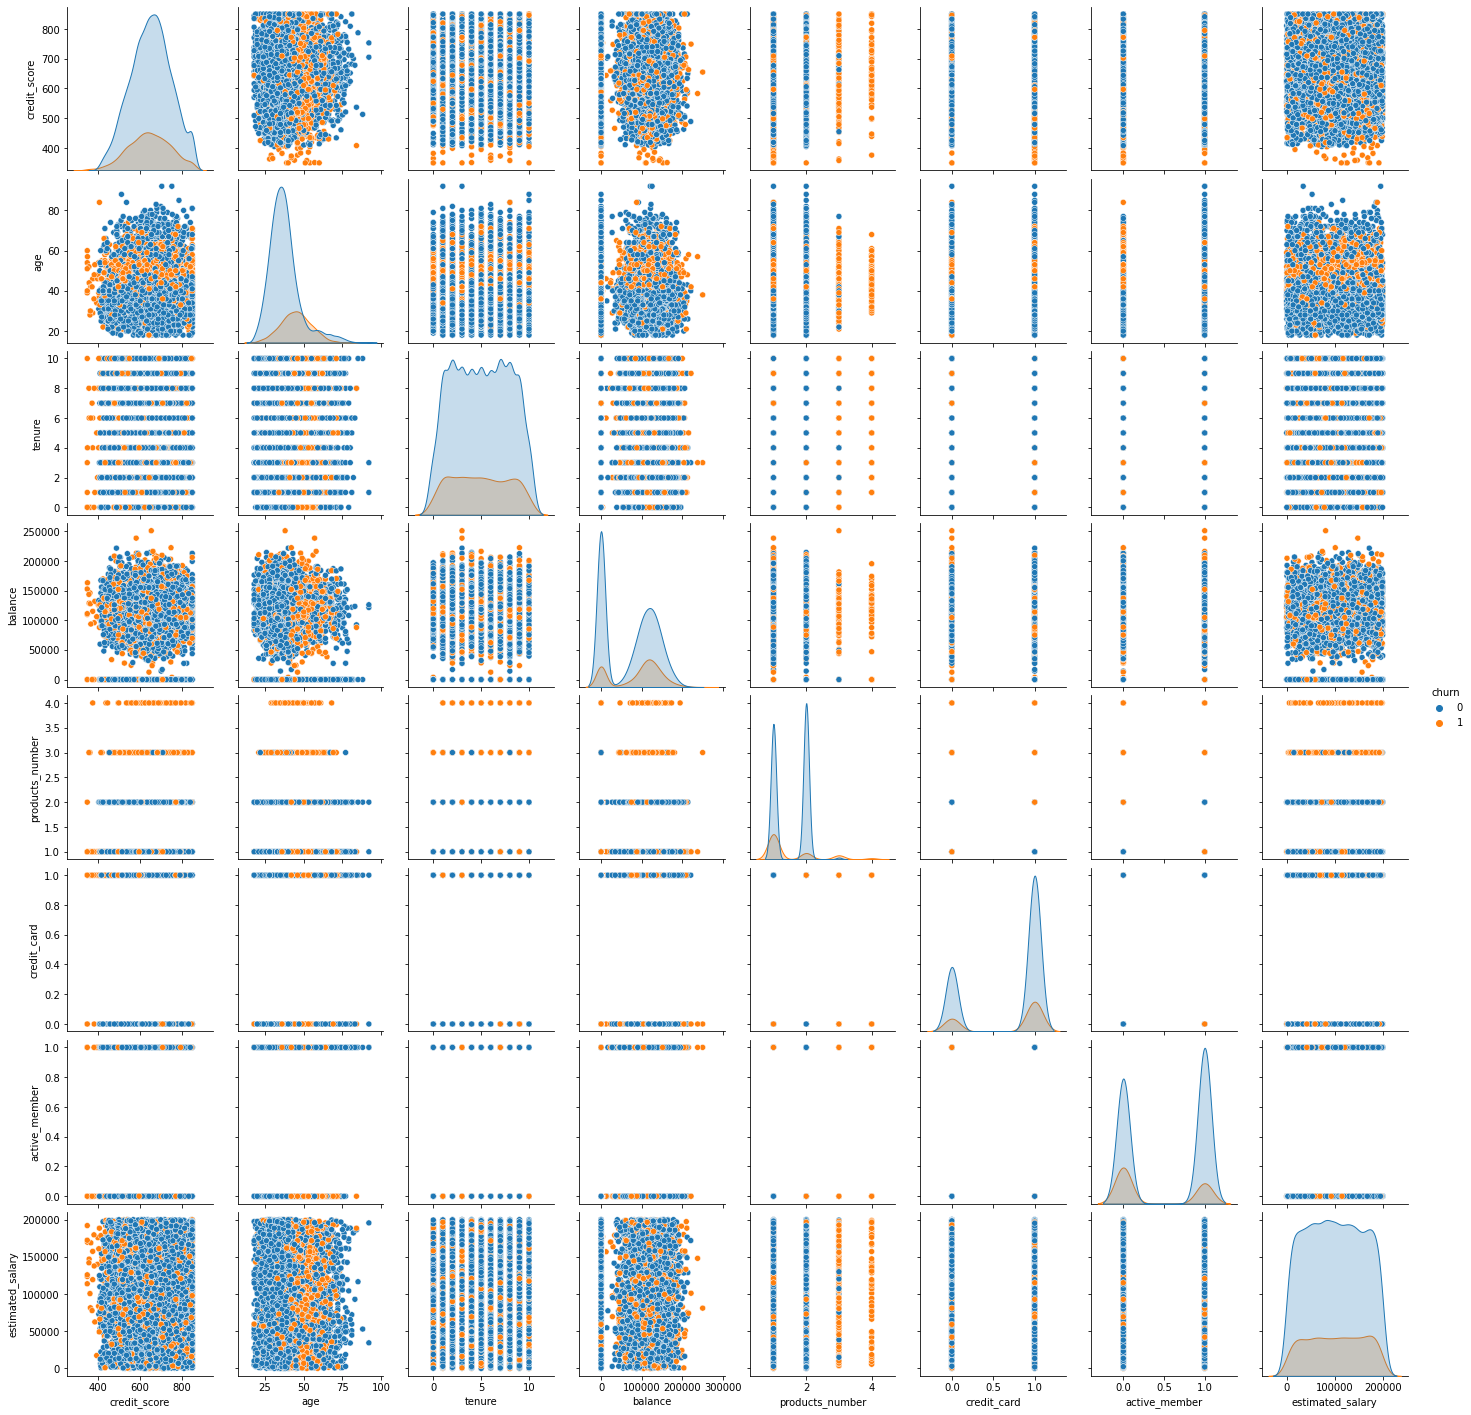

In [ ]:
#There appears to be an overrepresentation of age 50+ customers and churn.
#product_number 3 and 4 appear to have a higher rate of churn.
#inactive member have a higher churn rate than active members
sns.pairplot(bank, hue = 'churn')

In [ ]:
print(len(bank.loc[(bank['age'] >= 50) & (bank['churn'] == 1)]) / len(bank.loc[bank['age'] > 50]))
print(len(bank.loc[(bank['age'] < 50) & (bank['churn'] == 1)]) / len(bank.loc[bank['age'] < 50]))

print(len(bank.loc[bank['age'] >= 50]))
print(len(bank.loc[bank['age'] < 50]))

0.5027755749405234
0.1630447414294015
1395
8605


In [ ]:
bank_processed = pd.get_dummies(bank)
print(len(bank_processed.loc[(bank_processed['products_number_1'] == 1) & (bank_processed['churn'] == 1)]) / len(bank_processed.loc[(bank_processed['products_number_1'] == 1)]))
print(len(bank_processed.loc[(bank_processed['products_number_2'] == 1) & (bank_processed['churn'] == 1)]) / len(bank_processed.loc[(bank_processed['products_number_2'] == 1)]))
print(len(bank_processed.loc[(bank_processed['products_number_3'] == 1) & (bank_processed['churn'] == 1)]) / len(bank_processed.loc[(bank_processed['products_number_3'] == 1)]))
print(len(bank_processed.loc[(bank_processed['products_number_4'] == 1) & (bank_processed['churn'] == 1)]) / len(bank_processed.loc[(bank_processed['products_number_4'] == 1)]))

print(len(bank_processed.loc[(bank_processed['products_number_1'] == 1)]))
print(len(bank_processed.loc[(bank_processed['products_number_2'] == 1)]))
print(len(bank_processed.loc[(bank_processed['products_number_3'] == 1)]))
print(len(bank_processed.loc[(bank_processed['products_number_4'] == 1)]))

0.27714398111723054
0.07581699346405228
0.8270676691729323
1.0
5084
4590
266
60


In [ ]:
print(len(bank.loc[(bank['active_member'] == 1) & (bank['churn'] == 1)]) / len(bank.loc[bank['active_member'] == 1]))
print(len(bank.loc[(bank['active_member'] != 1) & (bank['churn'] == 1)]) / len(bank.loc[bank['active_member'] != 1]))

print(len(bank.loc[bank['active_member'] == 1]))
print(len(bank.loc[bank['active_member'] != 1]))

0.14269073966220153
0.26850897092183956
5151
4849


# Build preliminary models:

In [ ]:
#Logistic Regression
predictors = bank.columns.drop('churn')
x = pd.get_dummies(bank[predictors], drop_first=True)
y=bank['churn']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=1)

logmodel = LogisticRegression().fit(x_train, y_train)

y_pred_lm = logmodel.predict(x_test)

print(confusion_matrix(y_test,y_pred_lm))
print(classification_report(y_test, y_pred_lm))

[[2334   39]
 [ 602   25]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      2373
           1       0.39      0.04      0.07       627

    accuracy                           0.79      3000
   macro avg       0.59      0.51      0.48      3000
weighted avg       0.71      0.79      0.71      3000



In [ ]:
#kNN

myscaler = StandardScaler()
myscaler.fit(X = pd.get_dummies(bank[predictors], drop_first=True))

X = myscaler.transform(x)
tdf = pd.DataFrame(x, columns=bank.columns[:-1])

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
max_K = 100
cv_scores = [ ]
k_number = [ ]

#cross evaluation for differeent values of k to find optimal k

for K in range(1,max_K):
  knn = KNeighborsClassifier(n_neighbors = K)
  scores = cross_val_score(knn,X_train_scaled,y_train_scaled.values.ravel(), cv = 5, scoring = 'accuracy')
  cv_scores.append(scores.mean())

k_test_values = pd.DataFrame(
    {'cv_score': cv_scores,
    })

k_test_values.sort_values(by=['cv_score'], ascending=False)

,cv_score
30,0.844143
26,0.843286
38,0.843143
22,0.842857
28,0.842714
...,...
4,0.833857
3,0.833286
1,0.829857
2,0.824857


In [ ]:
#optimal k is 31
knn = KNeighborsClassifier(n_neighbors =31, metric='euclidean')
knn.fit(X_train_scaled, y_train_scaled)

y_pred_knn = knn.predict(X_test_scaled)

print(confusion_matrix(y_test_scaled,y_pred_knn))
print(classification_report(y_test_scaled,y_pred_knn))

[[2311   67]
 [ 405  217]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2378
           1       0.76      0.35      0.48       622

    accuracy                           0.84      3000
   macro avg       0.81      0.66      0.69      3000
weighted avg       0.83      0.84      0.82      3000



In [ ]:
#Decision Tree

dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
dt_model.fit(x_train,y_train)

y_pred_dt = dt_model.predict(x_test)

print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[2294   79]
 [ 394  233]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2373
           1       0.75      0.37      0.50       627

    accuracy                           0.84      3000
   macro avg       0.80      0.67      0.70      3000
weighted avg       0.83      0.84      0.82      3000



In [ ]:
# Random Forest

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[2336   37]
 [ 399  228]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2373
           1       0.86      0.36      0.51       627

    accuracy                           0.85      3000
   macro avg       0.86      0.67      0.71      3000
weighted avg       0.86      0.85      0.83      3000



In [ ]:
#Boosted Tree

bt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

bt_model.fit(x_train,y_train)
y_pred_bt = bt_model.predict(x_test)

print(confusion_matrix(y_test,y_pred_bt))
print(classification_report(y_test, y_pred_bt))

[[2294   79]
 [ 394  233]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2373
           1       0.75      0.37      0.50       627

    accuracy                           0.84      3000
   macro avg       0.80      0.67      0.70      3000
weighted avg       0.83      0.84      0.82      3000



In [ ]:
#Naive Bayes

nb_model = MultinomialNB(alpha=0.01)
nb_model.fit(x_train, y_train)

y_pred_nb = nb_model.predict(x_test)

print(confusion_matrix(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

[[1301 1072]
 [ 295  332]]
              precision    recall  f1-score   support

           0       0.82      0.55      0.66      2373
           1       0.24      0.53      0.33       627

    accuracy                           0.54      3000
   macro avg       0.53      0.54      0.49      3000
weighted avg       0.69      0.54      0.59      3000



In [ ]:
#ANN

min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = []

for s in range(min_hidden_layer_size, max_hidden_layer_size, 1):
  ann_model = MLPClassifier(hidden_layer_sizes = s, activation='logistic', solver='lbfgs', random_state=1, max_iter=10000)
  scores = cross_val_score(ann_model, X_train_scaled, y_train_scaled.values.ravel(), cv = 5, scoring ="accuracy")
  cv_scores.append(scores.mean())

s_test_values = pd.DataFrame(
    {'cv_score': cv_scores,
    })

s_test_values.sort_values(by=['cv_score'], ascending=False)


,cv_score
0,0.859571
1,0.857429
2,0.853286
3,0.852857
4,0.850286
5,0.847000
6,0.846000
7,0.843714
8,0.840571
11,0.838714


In [ ]:
opt_ann_model = MLPClassifier(hidden_layer_sizes = 5, activation ='logistic', solver='adam', random_state = 1, max_iter=10000)

opt_ann_model.fit(X_train_scaled, y_train_scaled)

y_pred_ann = opt_ann_model.predict(X_test_scaled)

print(confusion_matrix(y_test_scaled, y_pred_ann))
print(classification_report(y_test_scaled, y_pred_ann))

[[2286   92]
 [ 309  313]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2378
           1       0.77      0.50      0.61       622

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [ ]:
#Keras Classification
predictors = bank.columns.drop('churn')
x = pd.get_dummies(bank[predictors], drop_first=True)
y=bank['churn']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=1)

scaler = MinMaxScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
kc_model = Sequential()
kc_model.add(Dense(units=100,activation='relu'))
kc_model.add(Dropout(0.5))
kc_model.add(Dense(units=50,activation='relu'))
kc_model.add(Dropout(0.5))
kc_model.add(Dense(units=25,activation='relu'))
kc_model.add(Dropout(0.5))

kc_model.add(Dense(units=1,activation='sigmoid'))

kc_model.compile(loss='binary_crossentropy', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
kc_model.fit(x=X_train,
          y=y_train,
          batch_size=32,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
219/219 [==============================] - 4s 4ms/step - loss: 0.5247 - val_loss: 0.4360
Epoch 2/200
219/219 [==============================] - 1s 3ms/step - loss: 0.4537 - val_loss: 0.4151
Epoch 3/200
219/219 [==============================] - 1s 4ms/step - loss: 0.4322 - val_loss: 0.4039
Epoch 4/200
219/219 [==============================] - 1s 3ms/step - loss: 0.4254 - val_loss: 0.3919
Epoch 5/200
219/219 [==============================] - 1s 4ms/step - loss: 0.4145 - val_loss: 0.3821
Epoch 6/200
219/219 [==============================] - 1s 3ms/step - loss: 0.4062 - val_loss: 0.3773
Epoch 7/200
219/219 [==============================] - 1s 3ms/step - loss: 0.4004 - val_loss: 0.3724
Epoch 8/200
219/219 [==============================] - 1s 4ms/step - loss: 0.3945 - val_loss: 0.3666
Epoch 9/200
219/219 [==============================] - 1s 4ms/step - loss: 0.3939 - val_loss: 0.3648
Epoch 10/200
219/219 [==============================] - 1s 4ms/step - loss: 0.3965 - val_lo

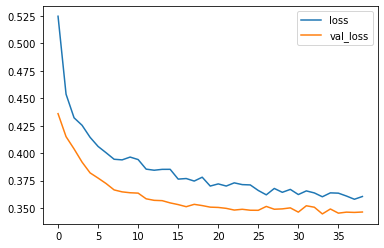

In [ ]:
model_loss = pd.DataFrame(kc_model.history.history)
model_loss.plot()

In [ ]:
y_pred_kc =(kc_model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test,y_pred_kc))
print(classification_report(y_test, y_pred_kc))
print('ROC AUC: ', roc_auc_score(y_test, y_pred_kc))

94/94 [==============================] - 0s 1ms/step
[[2305   68]
 [ 353  274]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.80      0.44      0.57       627

    accuracy                           0.86      3000
   macro avg       0.83      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000

ROC AUC:  0.7041729424123463


94/94 [==============================] - 0s 2ms/step


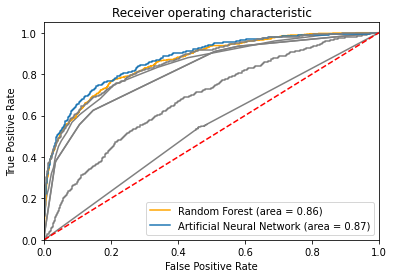

In [ ]:
#roc_auc curves
#Logmodel
log_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(x_test)[:,1])
lm_fpr, lm_tpr, lm_thresholds = roc_curve(y_test, logmodel.predict_proba(x_test)[:,1])

#kNN
knn_roc_auc = roc_auc_score(y_test_scaled, knn.predict_proba(X_test_scaled)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test_scaled, knn.predict_proba(X_test_scaled)[:,1])

#Decision Tree
dt_roc_auc = roc_auc_score(y_test, dt_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(x_test)[:,1])

# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(x_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(x_test)[:,1])

#Naive Bayes
nb_roc_auc = roc_auc_score(y_test, nb_model.predict_proba(x_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_model.predict_proba(x_test)[:,1])

#ANN
ann_roc_auc = roc_auc_score(y_test_scaled, opt_ann_model.predict_proba(X_test_scaled)[:,1])
ann_fpr, ann_tpr, ann_thresholds = roc_curve(y_test_scaled, opt_ann_model.predict_proba(X_test_scaled)[:,1])

#Keras Classification
kc_roc_auc = roc_auc_score(y_test, kc_model.predict(X_test))
kc_fpr, kc_tpr, kc_thresholds = roc_curve(y_test, kc_model.predict(X_test))


plt.figure()
plt.plot(lm_fpr, lm_tpr, color = 'grey')
plt.plot(knn_fpr, knn_tpr, color = 'grey')
plt.plot(fpr, tpr, color = 'grey')
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc, color = 'orange')
plt.plot(bt_fpr, bt_tpr, color = 'grey')
plt.plot(nb_fpr, nb_tpr,color = 'grey')
plt.plot(ann_fpr, ann_tpr, label='Artificial Neural Network (area = %0.2f)' % ann_roc_auc)
plt.plot(kc_fpr, kc_tpr, color = 'grey')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
print('log:', log_roc_auc)
print('knn:', knn_roc_auc)
print('dt:', dt_roc_auc)
print('rf:', rf_roc_auc)
print('bt:', bt_roc_auc)
print('nb:', nb_roc_auc)
print('ann:', ann_roc_auc)
print('kc:', kc_roc_auc)

log: 0.6820490486070365
knn: 0.8414732177868403
dt: 0.6691598263559139
rf: 0.8618495823898711
bt: 0.8140870411480565
nb: 0.5387903252365291
ann: 0.8722953439757262
kc: 0.7041729424123463
